In [1]:
import os, sys
# os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
# os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import tensorflow as tf
tf.compat.v1.enable_eager_execution()

import numpy as np
import imageio
import pprint

import matplotlib.pyplot as plt

import run_nerf
import run_nerf_helpers


### Load trained network weights
Run `bash download_example_weights.sh` in the root directory if you need to download the Lego example weights

Args:
expname = lego_test
basedir = ./logs
datadir = ./data/nerf_synthetic/lego
dataset_type = blender

half_res = True
no_batching = True

N_samples = 64
N_importance = 64

use_viewdirs = True

white_bkgd = True

N_rand = 1024
MODEL 63 27 <class 'int'> <class 'int'> True
(?, 90) (?, 63) (?, 27)
MODEL 63 27 <class 'int'> <class 'int'> True
(?, 90) (?, 63) (?, 27)
Not ndc!
Found ckpts ['./logs/lego_test/model_100000.npy']
Reloading from ./logs/lego_test/model_100000.npy
Resetting step to 100001
Reloading fine from ./logs/lego_test/model_fine_100000.npy
Render kwargs:
{'N_importance': 64,
 'N_samples': 64,
 'far': <tf.Tensor: id=989, shape=(), dtype=float32, numpy=6.0>,
 'lindisp': False,
 'ndc': False,
 'near': <tf.Tensor: id=988, shape=(), dtype=float32, numpy=2.0>,
 'network_fine': <tensorflow.python.keras.engine.training.Model object at 0x7f1110101c90>,
 'network_fn': <tensorflow.python.keras.engine.training.Model object at 0x7f1119a2fdd0>,
 'network_query_fn': <function create_nerf.

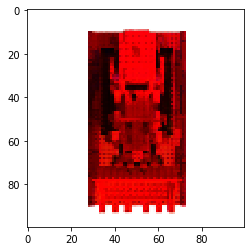

In [2]:
basedir = './logs'
expname = 'lego_test'

config = os.path.join(basedir, expname, 'config.txt')
print('Args:')
print(open(config, 'r').read())

parser = run_nerf.config_parser()
ft_str = '' 
ft_str = '--ft_path {}'.format(os.path.join(basedir, expname, 'model_100000.npy'))
args = parser.parse_args('--config {} '.format(config) + ft_str)

# Create nerf model
_, render_kwargs_test, start, grad_vars, models = run_nerf.create_nerf(args)

bds_dict = {
    'near' : tf.cast(2., tf.float32),
    'far' : tf.cast(6., tf.float32),
}
render_kwargs_test.update(bds_dict)

print('Render kwargs:')
pprint.pprint(render_kwargs_test)

net_fn = render_kwargs_test['network_query_fn']
print(net_fn)

# Render an overhead view to check model was loaded correctly
c2w = np.eye(4)[:3,:4].astype(np.float32) # identity pose matrix
c2w[2,-1] = 4.
H, W, focal = 800, 800, 1200.
down = 8
test = run_nerf.render(H//down, W//down, focal/down, c2w=c2w, **render_kwargs_test)
img = np.clip(test[0],0,1)
plt.imshow(img)
plt.show()

Args:
expname = hotdog_test
basedir = ./logs
datadir = ./data/nerf_synthetic/hotdog
dataset_type = blender

half_res = True
no_batching = True

N_samples = 64
N_importance = 64

use_viewdirs = True

white_bkgd = True

N_rand = 1024

lrate = 1e-3
MODEL 63 27 <class 'int'> <class 'int'> True
(?, 90) (?, 63) (?, 27)
MODEL 63 27 <class 'int'> <class 'int'> True
(?, 90) (?, 63) (?, 27)
Not ndc!
Found ckpts ['./logs/hotdog_test/model_100000.npy']
Reloading from ./logs/hotdog_test/model_100000.npy
Resetting step to 100001
Reloading fine from ./logs/hotdog_test/model_fine_100000.npy
Render kwargs:
{'N_importance': 64,
 'N_samples': 64,
 'far': <tf.Tensor: id=21080, shape=(), dtype=float32, numpy=6.0>,
 'lindisp': False,
 'ndc': False,
 'near': <tf.Tensor: id=21079, shape=(), dtype=float32, numpy=2.0>,
 'network_fine': <tensorflow.python.keras.engine.training.Model object at 0x7f1000f57510>,
 'network_fn': <tensorflow.python.keras.engine.training.Model object at 0x7f1000f5eb90>,
 'network_query

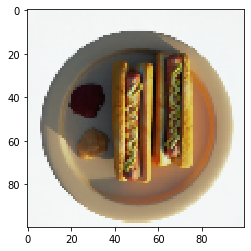

(100, 100, 4, 3)
tf.Tensor(
[[ 0.7220921   0.7852267   0.75142765]
 [-0.02963012 -0.03557055 -0.00241464]
 [ 0.12920901  0.10889873  0.0552758 ]
 [-0.09159426 -0.07018037 -0.03473175]], shape=(4, 3), dtype=float32)
tf.Tensor(
[[ 0.85004574  0.85014164  0.7564113 ]
 [ 0.004013   -0.01175666 -0.00530918]
 [ 0.09440334  0.10118981  0.06239435]
 [ 0.01129079 -0.004176   -0.01350969]], shape=(4, 3), dtype=float32)
tf.Tensor(
[[ 7.06951261e-01  7.79919565e-01  7.41396606e-01]
 [-3.84547971e-02 -3.23727541e-02  2.17465804e-05]
 [ 1.30315185e-01  1.05716154e-01  5.53528108e-02]
 [-9.17968750e-02 -6.85285926e-02 -3.33426595e-02]], shape=(4, 3), dtype=float32)


In [7]:
basedir_ = './logs'
expname_ = 'hotdog_test'

config_ = os.path.join(basedir_, expname_, 'config.txt')
print('Args:')
print(open(config_, 'r').read())

parser_ = run_nerf.config_parser()
ft_str_ = '' 
ft_str_ = '--ft_path {}'.format(os.path.join(basedir_, expname_, 'model_100000.npy'))
args_ = parser_.parse_args('--config {} '.format(config_) + ft_str_)

# Create nerf model
_, render_kwargs_test_, start_, grad_vars_, models_ = run_nerf.create_nerf(args_)

bds_dict_ = {
    'near' : tf.cast(2., tf.float32),
    'far' : tf.cast(6., tf.float32),
}
render_kwargs_test_.update(bds_dict_)

print('Render kwargs:')
pprint.pprint(render_kwargs_test_)

net_fn_ = render_kwargs_test['network_query_fn']
print(net_fn_)

# Render an overhead view to check model was loaded correctly
c2w_ = np.eye(4)[:3,:4].astype(np.float32) # identity pose matrix
c2w_[2,-1] = 4.
H_, W_, focal_ = 800, 800, 1200.
down_ = 8
test_ = run_nerf.render(H_//down_, W_//down_, focal_/down_, c2w=c2w_, **render_kwargs_test_)
img_ = np.clip(test_[0],0,1)
plt.imshow(img_)
plt.show()

print(test_[3].shape)
print(test_[3][40][40])
print(test_[3][50][50])
print(test_[3][60][60])



{'network_query_fn': <function create_nerf.<locals>.network_query_fn at 0x7ff1688d9680>, 'perturb': False, 'N_importance': 64, 'network_fine': <tensorflow.python.keras.engine.training.Model object at 0x7ff160118950>, 'N_samples': 64, 'network_fn': <tensorflow.python.keras.engine.training.Model object at 0x7ff168b044d0>, 'use_viewdirs': True, 'white_bkgd': True, 'raw_noise_std': 0.0, 'ndc': False, 'lindisp': False, 'near': <tf.Tensor: id=988, shape=(), dtype=float32, numpy=2.0>, 'far': <tf.Tensor: id=989, shape=(), dtype=float32, numpy=6.0>}
{'network_query_fn': <function create_nerf.<locals>.network_query_fn at 0x7ff1688d9680>, 'perturb': False, 'N_importance': 64, 'network_fine': <tensorflow.python.keras.engine.training.Model object at 0x7ff160118950>, 'N_samples': 64, 'network_fn': <tensorflow.python.keras.engine.training.Model object at 0x7ff168b044d0>, 'use_viewdirs': True, 'white_bkgd': True, 'raw_noise_std': 0.0, 'ndc': False, 'lindisp': False, 'near': <tf.Tensor: id=988, shape=(

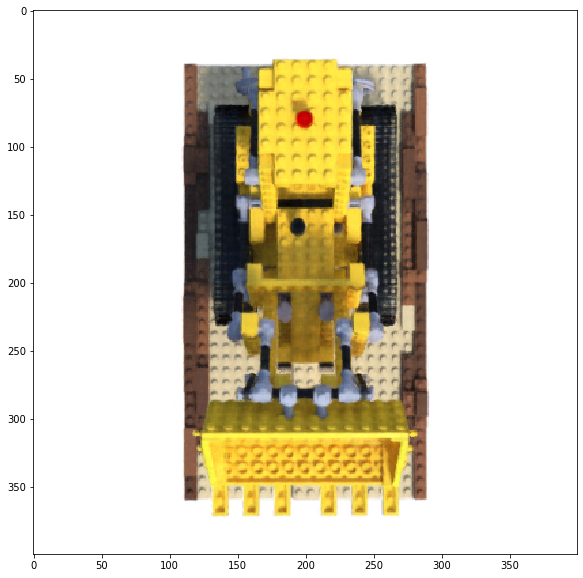

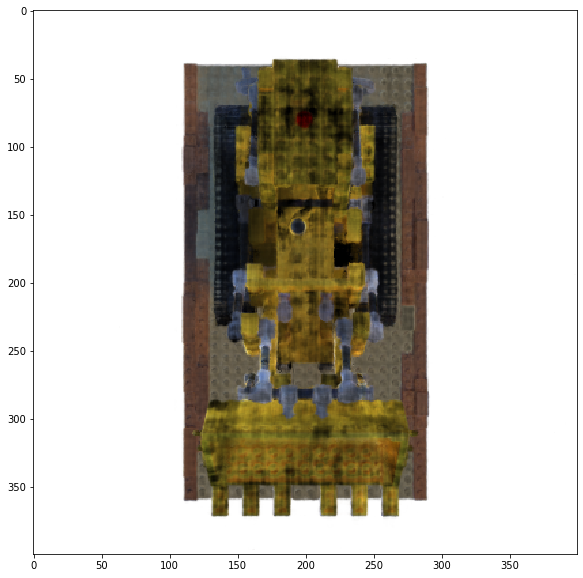

In [11]:
# temp = {}
temp = render_kwargs_test.copy()
for key in render_kwargs_test_:
    filter = {
        'use_viewdirs': True,
        'ndc': True,
        'near': True,
        'far': True
    }
    if filter.get(key): continue
    temp[key+'_'] = render_kwargs_test_[key]
#render_kwargs_test_ = temp # rename variables in render_kwargs_test_
print(render_kwargs_test)
print(temp)

down_ = 2

result = run_nerf.render(H_//down_, W_//down_, focal_/down_, c2w=c2w_, **render_kwargs_test)
result_ = run_nerf.render(H_//down_, W_//down_, focal_/down_, c2w=c2w_, **temp)

result = np.clip(result[0],0,1)
result_ = np.clip(result_[0],0,1)


plt.figure(figsize=(10,10))
plt.imshow(result)
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(result_)
plt.show()

In [1]:
### Query network on dense 3d grid of points

In [2]:
N = 256
t = np.linspace(-1.2, 1.2, N+1)

query_pts = np.stack(np.meshgrid(t, t, t), -1).astype(np.float32)
print(query_pts.shape)
sh = query_pts.shape
flat = query_pts.reshape([-1,3])


def batchify(fn, chunk):
    if chunk is None:
        return fn
    def ret(inputs):
        return tf.concat([fn(inputs[i:i+chunk]) for i in range(0, inputs.shape[0], chunk)], 0)
    return ret
    
    
fn = lambda i0, i1 : net_fn(flat[i0:i1,None,:], viewdirs=np.zeros_like(flat[i0:i1]), network_fn=render_kwargs_test['network_fine'])
chunk = 1024*64
raw = np.concatenate([fn(i, i+chunk).numpy() for i in range(0, flat.shape[0], chunk)], 0)
raw = np.reshape(raw, list(sh[:-1]) + [-1])
sigma = np.maximum(raw[...,-1], 0.)

print(raw.shape)
plt.hist(np.maximum(0,sigma.ravel()), log=True)
plt.show()

NameError: name 'np' is not defined

### Marching cubes with [PyMCubes](https://github.com/pmneila/PyMCubes)
Change `threshold` to use a different sigma threshold for the isosurface

In [ ]:
import mcubes

threshold = 50.
print('fraction occupied', np.mean(sigma > threshold))
vertices, triangles = mcubes.marching_cubes(sigma, threshold)
print('done', vertices.shape, triangles.shape)

### Uncomment to save out the mesh
# mcubes.export_mesh(vertices, triangles, "logs/lego_example/lego_{}.dae".format(N), "lego")

### Live preview with [trimesh](https://github.com/mikedh/trimesh)
Click and drag to change viewpoint

In [ ]:
import trimesh

mesh = trimesh.Trimesh(vertices / N - .5, triangles)
mesh.show()

### Save out video with [pyrender](https://github.com/mmatl/pyrender)

In [ ]:
os.environ["PYOPENGL_PLATFORM"] = "egl"
import pyrender
from load_blender import pose_spherical

In [ ]:
scene = pyrender.Scene()
scene.add(pyrender.Mesh.from_trimesh(mesh, smooth=False))

# Set up the camera -- z-axis away from the scene, x-axis right, y-axis up
camera = pyrender.PerspectiveCamera(yfov=np.pi / 3.0)

camera_pose = pose_spherical(-20., -40., 1.).numpy()
nc = pyrender.Node(camera=camera, matrix=camera_pose)
scene.add_node(nc)

# Set up the light -- a point light in the same spot as the camera
light = pyrender.PointLight(color=np.ones(3), intensity=4.0)
nl = pyrender.Node(light=light, matrix=camera_pose)
scene.add_node(nl)

# Render the scene
r = pyrender.OffscreenRenderer(640, 480)
color, depth = r.render(scene)

plt.imshow(color)
plt.show()
plt.imshow(depth)
plt.show()


In [ ]:
imgs = []
for th in np.linspace(0, 360., 120+1)[:-1]:
    camera_pose = pose_spherical(th, -40., 1.).numpy()
    scene.set_pose(nc, pose=camera_pose)
    imgs.append(r.render(scene)[0])
f = 'logs/lego_example/lego_mesh_turntable.mp4'
imageio.mimwrite(f, imgs, fps=30)
print('done')

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open(f,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls autoplay loop>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)